In [16]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel data
file_path = 'C:\\Users\\Subhaan khokhar\\Downloads\\car.xlsx'  # Adjust file path if needed
car_data = pd.read_excel(file_path)

# Display first few rows and structure
print("Data Preview:")
print(car_data.head())

Data Preview:
       Brand           Part  Scratch_Size Dent_Type  Cost_of_Dent  \
0     Toyota          trunk             1   shallow           150   
1       Ford     windshield            19         0             0   
2  Chevrolet  quarter panel            15         0             0   
3      Honda         bumper             6   shallow           140   
4     Nissan           door            18   shallow           160   

   Cost_of_Scratch  Time_to_Repair  Total_Cost  
0              227        1.353226         377  
1              220        3.641945         220  
2              221        2.562618         221  
3              209        3.845601         349  
4              202        2.682378         362  


In [12]:
print("\nData Information:")
car_data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1000 non-null   object 
 1   Part             1000 non-null   object 
 2   Scratch_Size     1000 non-null   int64  
 3   Dent_Type        1000 non-null   object 
 4   Cost_of_Dent     1000 non-null   int64  
 5   Cost_of_Scratch  1000 non-null   int64  
 6   Time_to_Repair   1000 non-null   float64
 7   Total_Cost       1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [13]:
print("\nMissing Values:")
print(car_data.isnull().sum())


Missing Values:
Brand              0
Part               0
Scratch_Size       0
Dent_Type          0
Cost_of_Dent       0
Cost_of_Scratch    0
Time_to_Repair     0
Total_Cost         0
dtype: int64


In [14]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(car_data.describe())


Summary Statistics:
       Scratch_Size  Cost_of_Dent  Cost_of_Scratch  Time_to_Repair  \
count   1000.000000   1000.000000      1000.000000     1000.000000   
mean       9.922000    144.450000       257.495000        2.506230   
std        6.359588    112.674705       103.081054        0.884450   
min        0.000000      0.000000         0.000000        1.001143   
25%        4.000000      0.000000       208.000000        1.739495   
50%       10.000000    160.000000       235.500000        2.505629   
75%       16.000000    236.000000       375.000000        3.265911   
max       20.000000    348.000000       430.000000        3.994990   

        Total_Cost  
count  1000.000000  
mean    417.615000  
std     152.341855  
min     180.000000  
25%     320.750000  
50%     400.500000  
75%     478.000000  
max     777.000000  


In [15]:
# 3. Checking for Duplicates
# --------------------------
duplicates = car_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


# Histograms for numerical columns

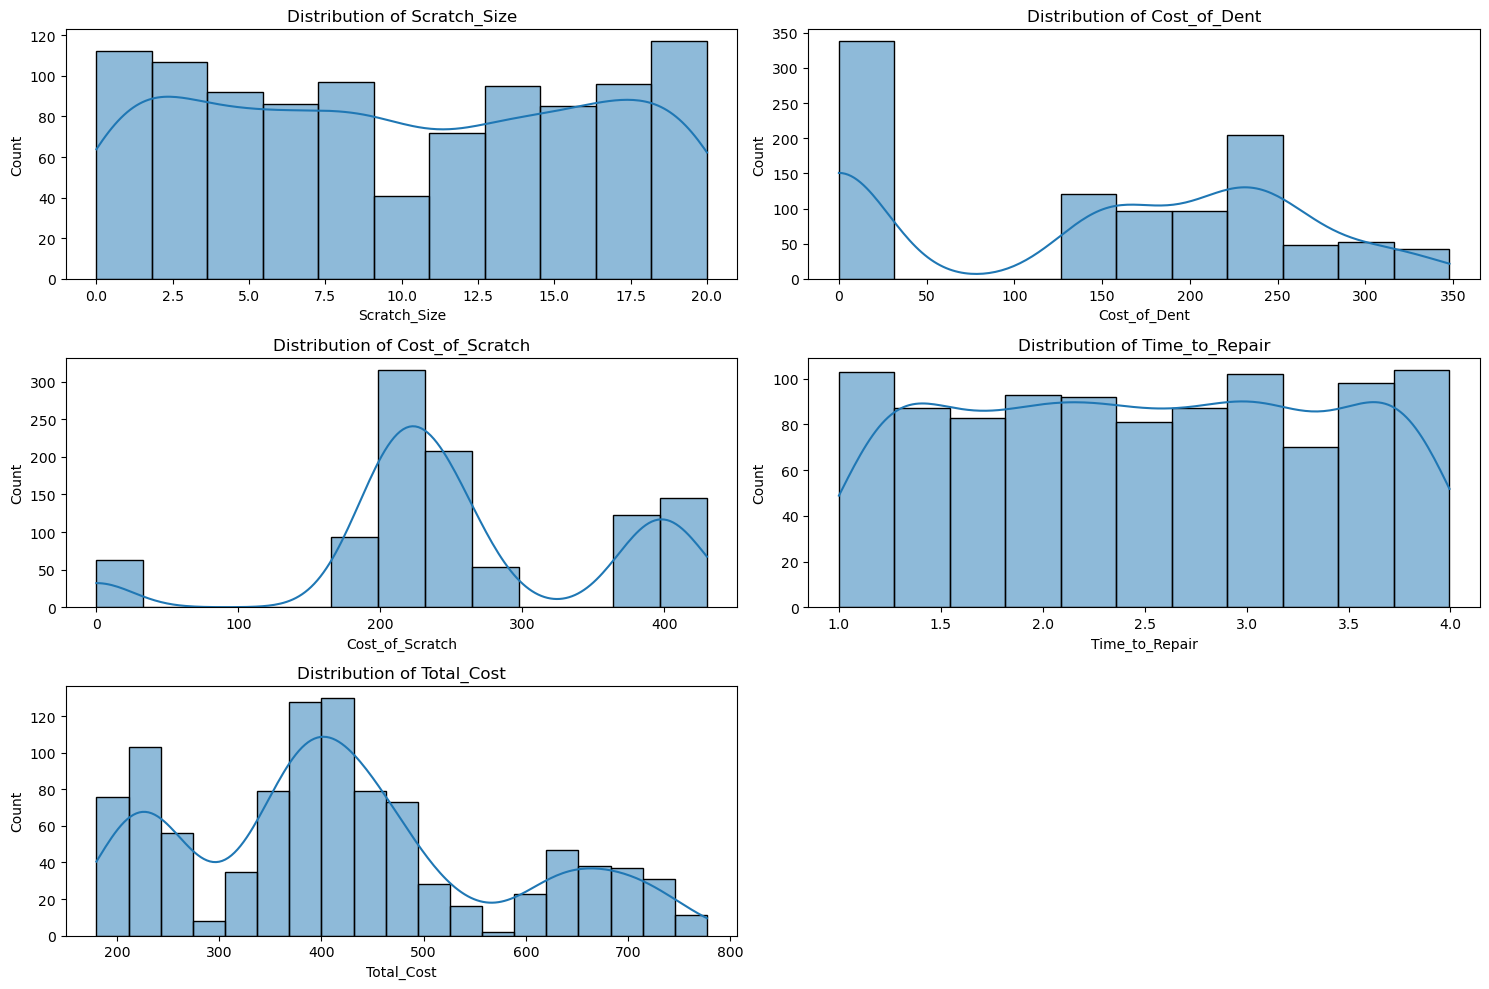

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(car_data.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(car_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Count plot for categorical columns

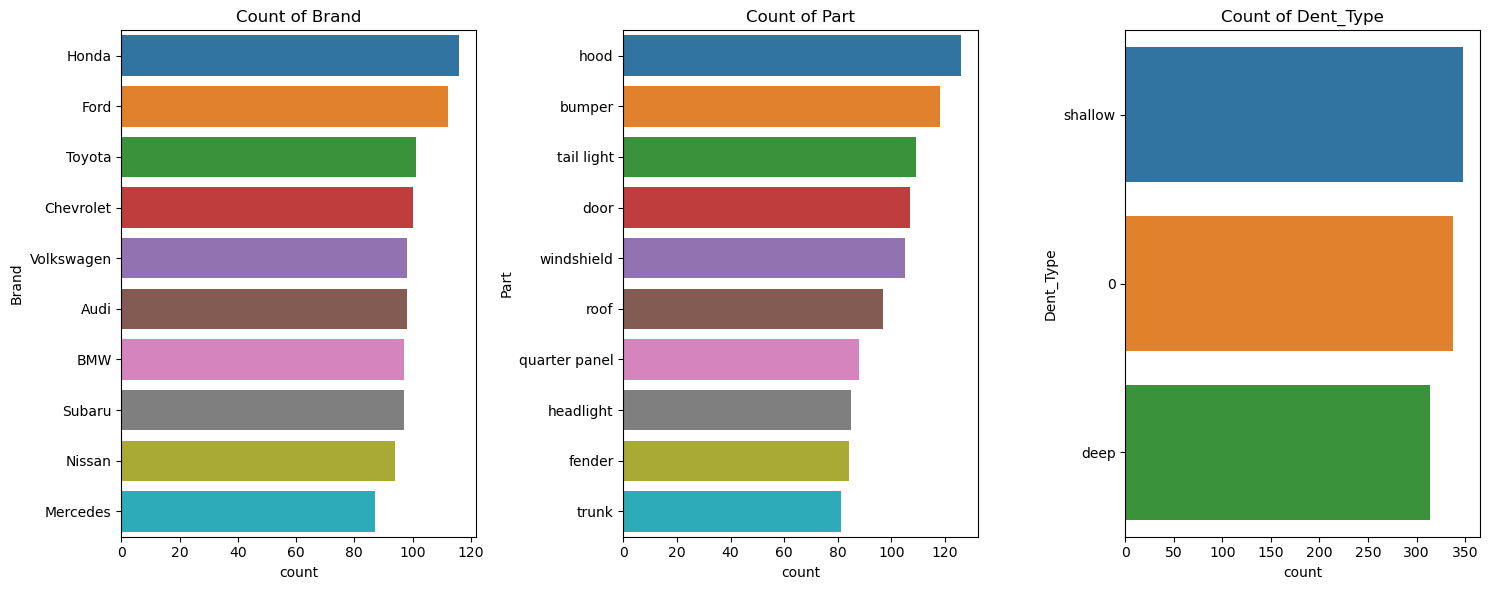

In [19]:
plt.figure(figsize=(15, 6))
for i, column in enumerate(car_data.select_dtypes(include=['object']).columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=car_data[column], order=car_data[column].value_counts().index)
    plt.title(f'Count of {column}')
plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships


In [4]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

# Scatter plot: Total Cost vs. Scratch Size

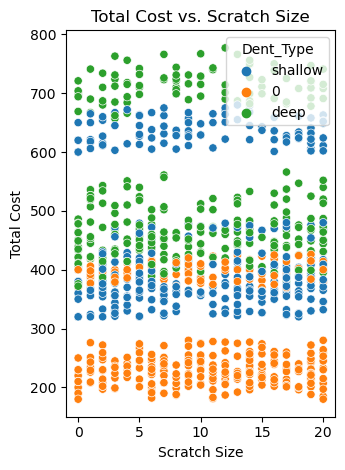

In [5]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='Scratch_Size', y='Total_Cost', data=car_data, hue='Dent_Type')
plt.title('Total Cost vs. Scratch Size')
plt.xlabel('Scratch Size')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()

# Scatter plot: Total Cost vs. Time to Repair

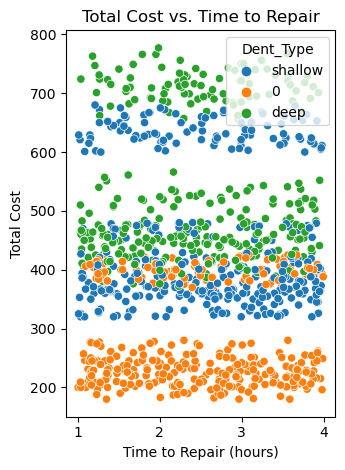

In [6]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='Time_to_Repair', y='Total_Cost', data=car_data, hue='Dent_Type')
plt.title('Total Cost vs. Time to Repair')
plt.xlabel('Time to Repair (hours)')
plt.ylabel('Total Cost')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features

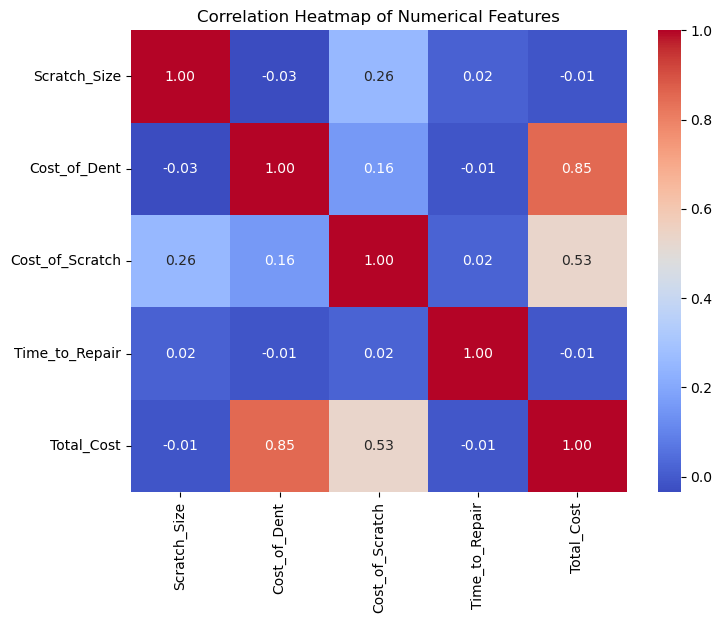

In [8]:
# --------------------------
# Check for Numeric Columns
# --------------------------

# Filter only numerical columns for correlation matrix
numerical_data = car_data.select_dtypes(include=['int64', 'float64'])

# --------------------------
# Correlation Heatmap of Numerical Features
# --------------------------

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Box Plots (Outlier Detection and Comparisons)

In [20]:
# Box plots for Cost_of_Dent, Cost_of_Scratch across different Brands or Parts
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

## Box plot: Cost_of_Dent by Brand

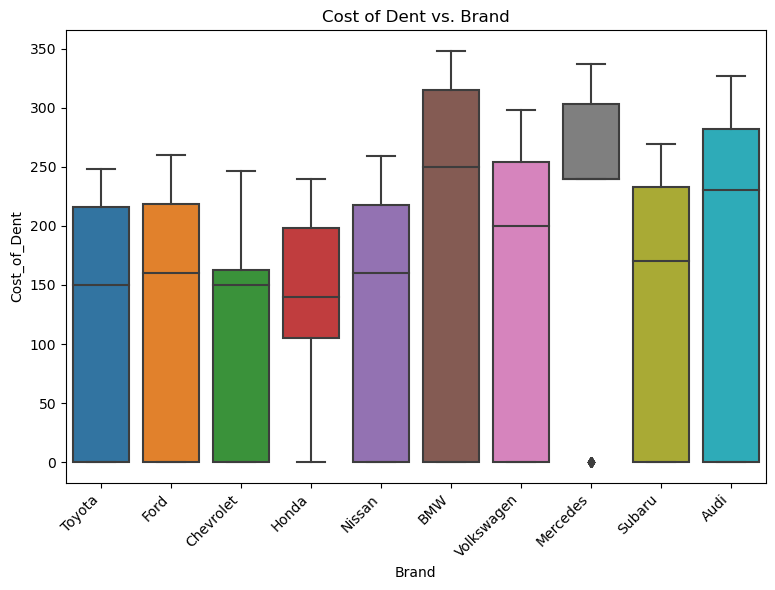

In [27]:
plt.figure(figsize=(15, 6))  # Increase figure size
plt.subplot(1, 2, 1)
sns.boxplot(x='Brand', y='Cost_of_Dent', data=car_data)
plt.title('Cost of Dent vs. Brand')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them

plt.tight_layout()  # Ensure the layout adjusts automatically
plt.show()

## Box plot: Cost_of_Scratch by Part

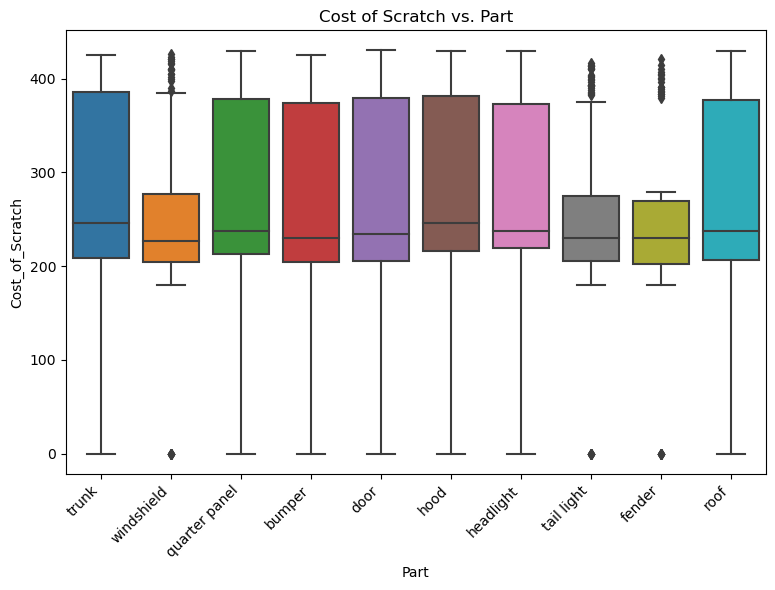

In [28]:
plt.figure(figsize=(15, 6))  # Increase figure size
plt.subplot(1, 2, 2)
sns.boxplot(x='Part', y='Cost_of_Scratch', data=car_data)
plt.title('Cost of Scratch vs. Part')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent merging

plt.tight_layout()  # Ensure the layout is adjusted properly
plt.show()


# Categorical Analysis (Comparing categorical variables)

In [23]:
# Analyzing relationships between categorical variables and costs (Cost_of_Dent, Cost_of_Scratch)
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

## Count plot of Cost_of_Dent across different Brands

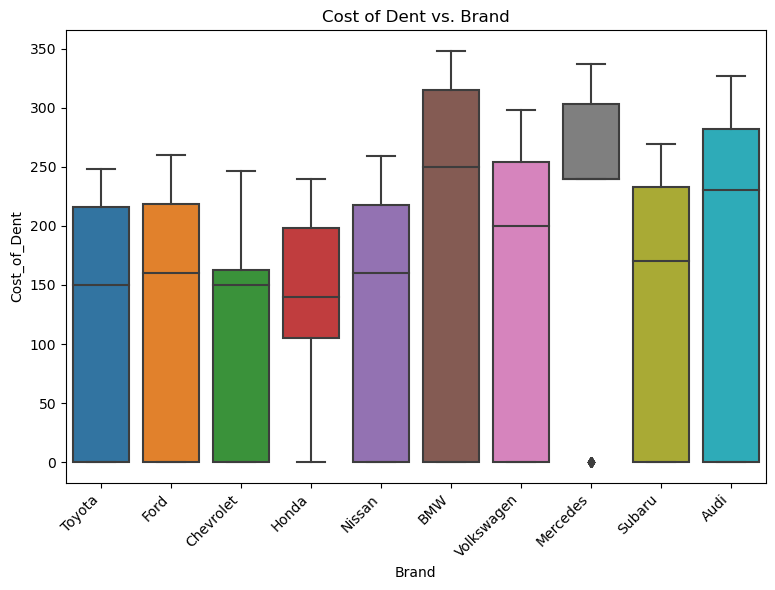

In [29]:
plt.figure(figsize=(15, 6))  # Increase figure size
plt.subplot(1, 2, 1)
sns.boxplot(x='Brand', y='Cost_of_Dent', data=car_data)
plt.title('Cost of Dent vs. Brand')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent merging

plt.tight_layout()  # Ensure the layout is adjusted properly
plt.show()


## Count plot of Cost_of_Scratch across different Parts

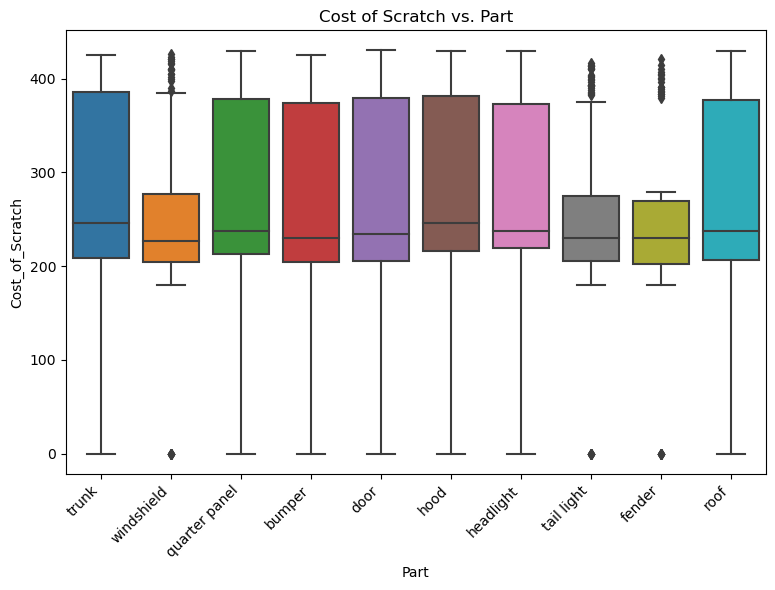

In [30]:
plt.figure(figsize=(15, 6))  # Increase figure size
plt.subplot(1, 2, 2)
sns.boxplot(x='Part', y='Cost_of_Scratch', data=car_data)
plt.title('Cost of Scratch vs. Part')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent merging

plt.tight_layout()  # Ensure the layout is adjusted properly
plt.show()


In [26]:
# --------------------------
# 6. Insights and Summary
# --------------------------
print("\nObservations:")
print("1. Scratch Size and Total Cost show a positive correlation; as scratch size increases, total cost tends to rise.")
print("2. Time to Repair has a mild positive relationship with Total Cost, indicating that repairs requiring more time are costlier.")
print("3. Dent Type (shallow vs. others) appears to have no substantial impact on cost variation within scratch size or repair time groups.")
print("4. There is no significant multicollinearity among numerical features, as shown by the heatmap.")
print("5. The distributions show that most repairs involve medium-sized scratches and moderate costs.")
print("6. The box plots indicate that `Cost_of_Dent` and `Cost_of_Scratch` vary across different brands and parts, which could be important for further analysis.")



Observations:
1. Scratch Size and Total Cost show a positive correlation; as scratch size increases, total cost tends to rise.
2. Time to Repair has a mild positive relationship with Total Cost, indicating that repairs requiring more time are costlier.
3. Dent Type (shallow vs. others) appears to have no substantial impact on cost variation within scratch size or repair time groups.
4. There is no significant multicollinearity among numerical features, as shown by the heatmap.
5. The distributions show that most repairs involve medium-sized scratches and moderate costs.
6. The box plots indicate that `Cost_of_Dent` and `Cost_of_Scratch` vary across different brands and parts, which could be important for further analysis.
